## Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Load Data

In [4]:
diamonds_df = sns.load_dataset('diamonds')
diamonds_df = diamonds_df.sample(n = 100)
diamonds_df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
15491,1.23,Premium,I,VS2,61.1,60.0,6206,6.95,6.89,4.23
5630,0.90,Very Good,H,VS2,63.0,61.0,3878,6.05,6.14,3.84
39884,0.42,Ideal,G,VVS2,62.2,56.0,1103,4.81,4.77,2.98
26893,2.04,Very Good,I,VS2,62.5,58.0,16874,8.09,8.22,5.10
13268,1.00,Good,G,VS2,63.7,57.0,5484,6.32,6.28,4.01


### Line Plot

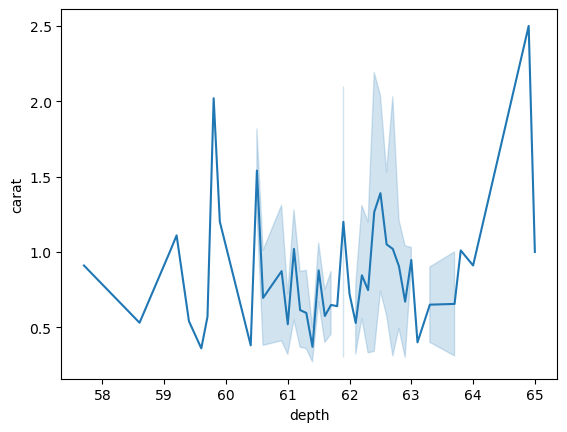

In [5]:
sns.lineplot(data=diamonds_df,x='depth',y='carat')
plt.show()

### Scatter Plot

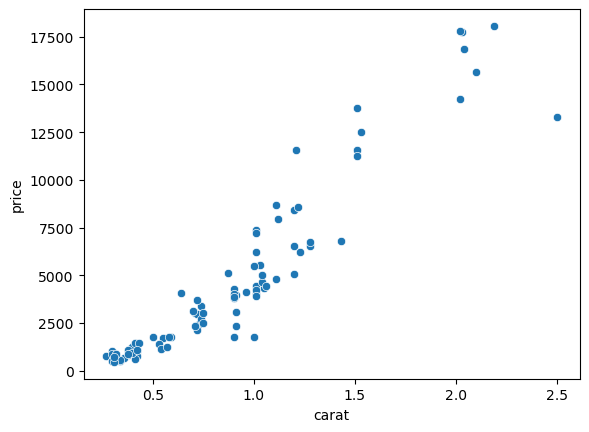

In [6]:
sns.scatterplot(data=diamonds_df,x='carat',y='price')
plt.show()

### Histrogram Plot

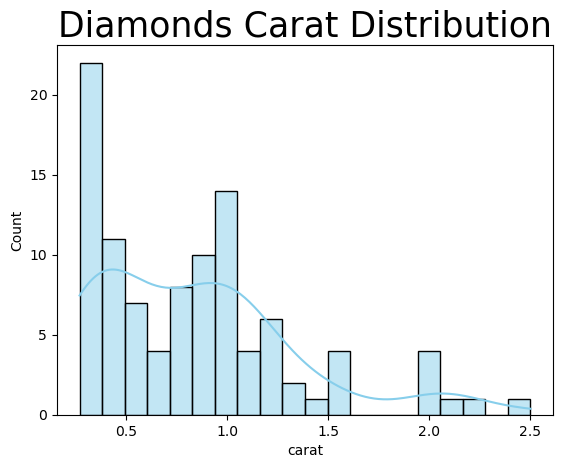

In [7]:
sns.histplot(diamonds_df.carat,color = 'skyblue',bins = 20,kde = True)
plt.title('Diamonds Carat Distribution',fontsize = 25)
plt.show()

In [8]:
data = diamonds_df.iloc[:,0]
bin_width = 3.5 * np.std(data) / (len(data) ** (1/3))

# Calculate number of bins
num_bins = int((max(data) - min(data)) / bin_width)

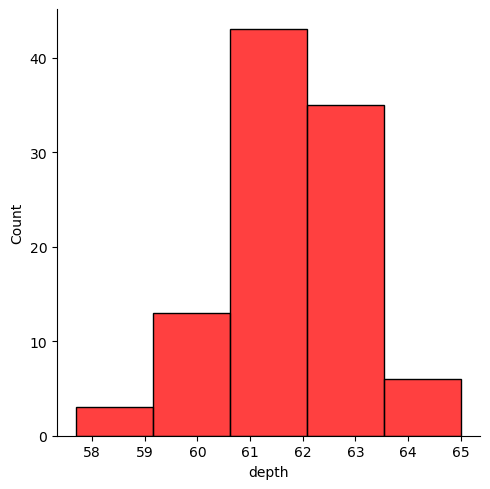

In [9]:
sns.displot(diamonds_df['depth'],bins = num_bins,color = 'red')
plt.show()

### Joint Plot

In [10]:
diamonds_df['log_carat'] = np.log(diamonds_df.carat)
diamonds_df['log_price'] = np.log(diamonds_df.price)

<Figure size 640x480 with 0 Axes>

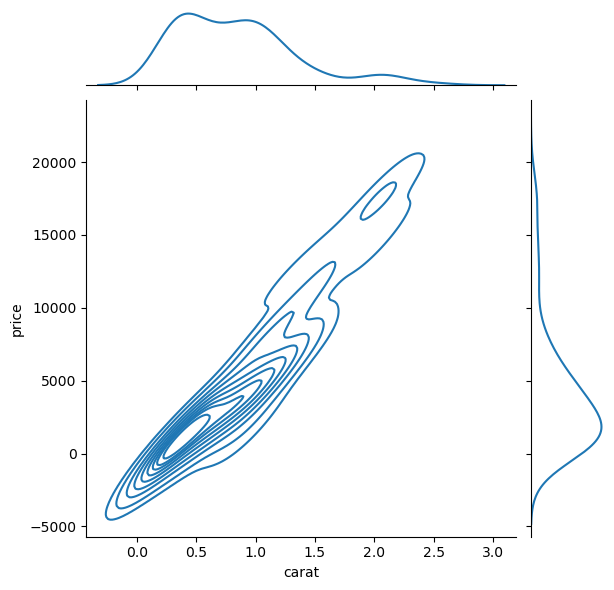

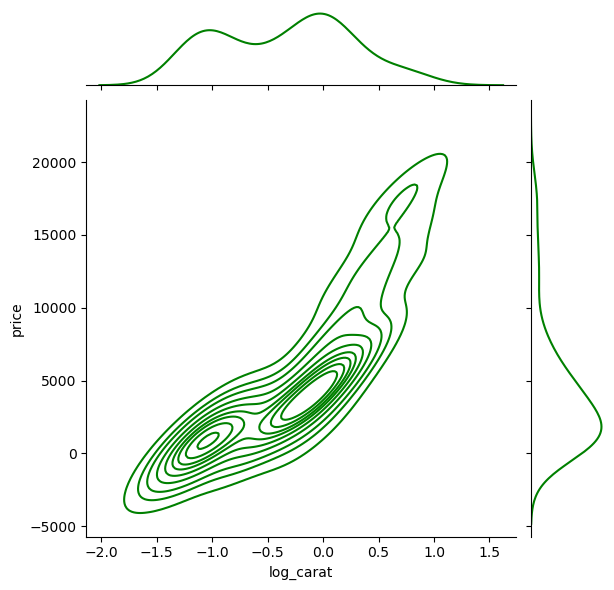

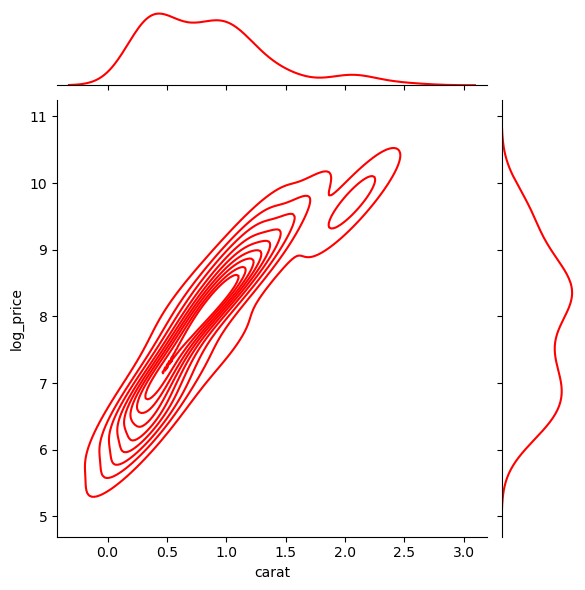

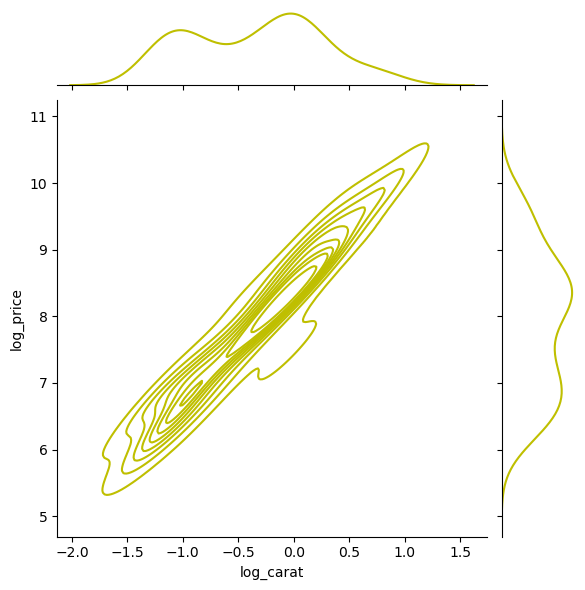

In [11]:
plt.figure(141)
sns.jointplot(x = 'carat',y = 'price',data = diamonds_df,kind = 'kde')
plt.figure(142)
sns.jointplot(x = 'log_carat',y = 'price',data = diamonds_df,kind = 'kde',color = 'g')
plt.figure(143)
sns.jointplot(x = 'carat',y = 'log_price',data = diamonds_df,kind = 'kde',color = 'r')
plt.figure(144)
sns.jointplot(x = 'log_carat',y = 'log_price',data = diamonds_df,kind = 'kde',color = 'y')
plt.show()

### Pair Plot

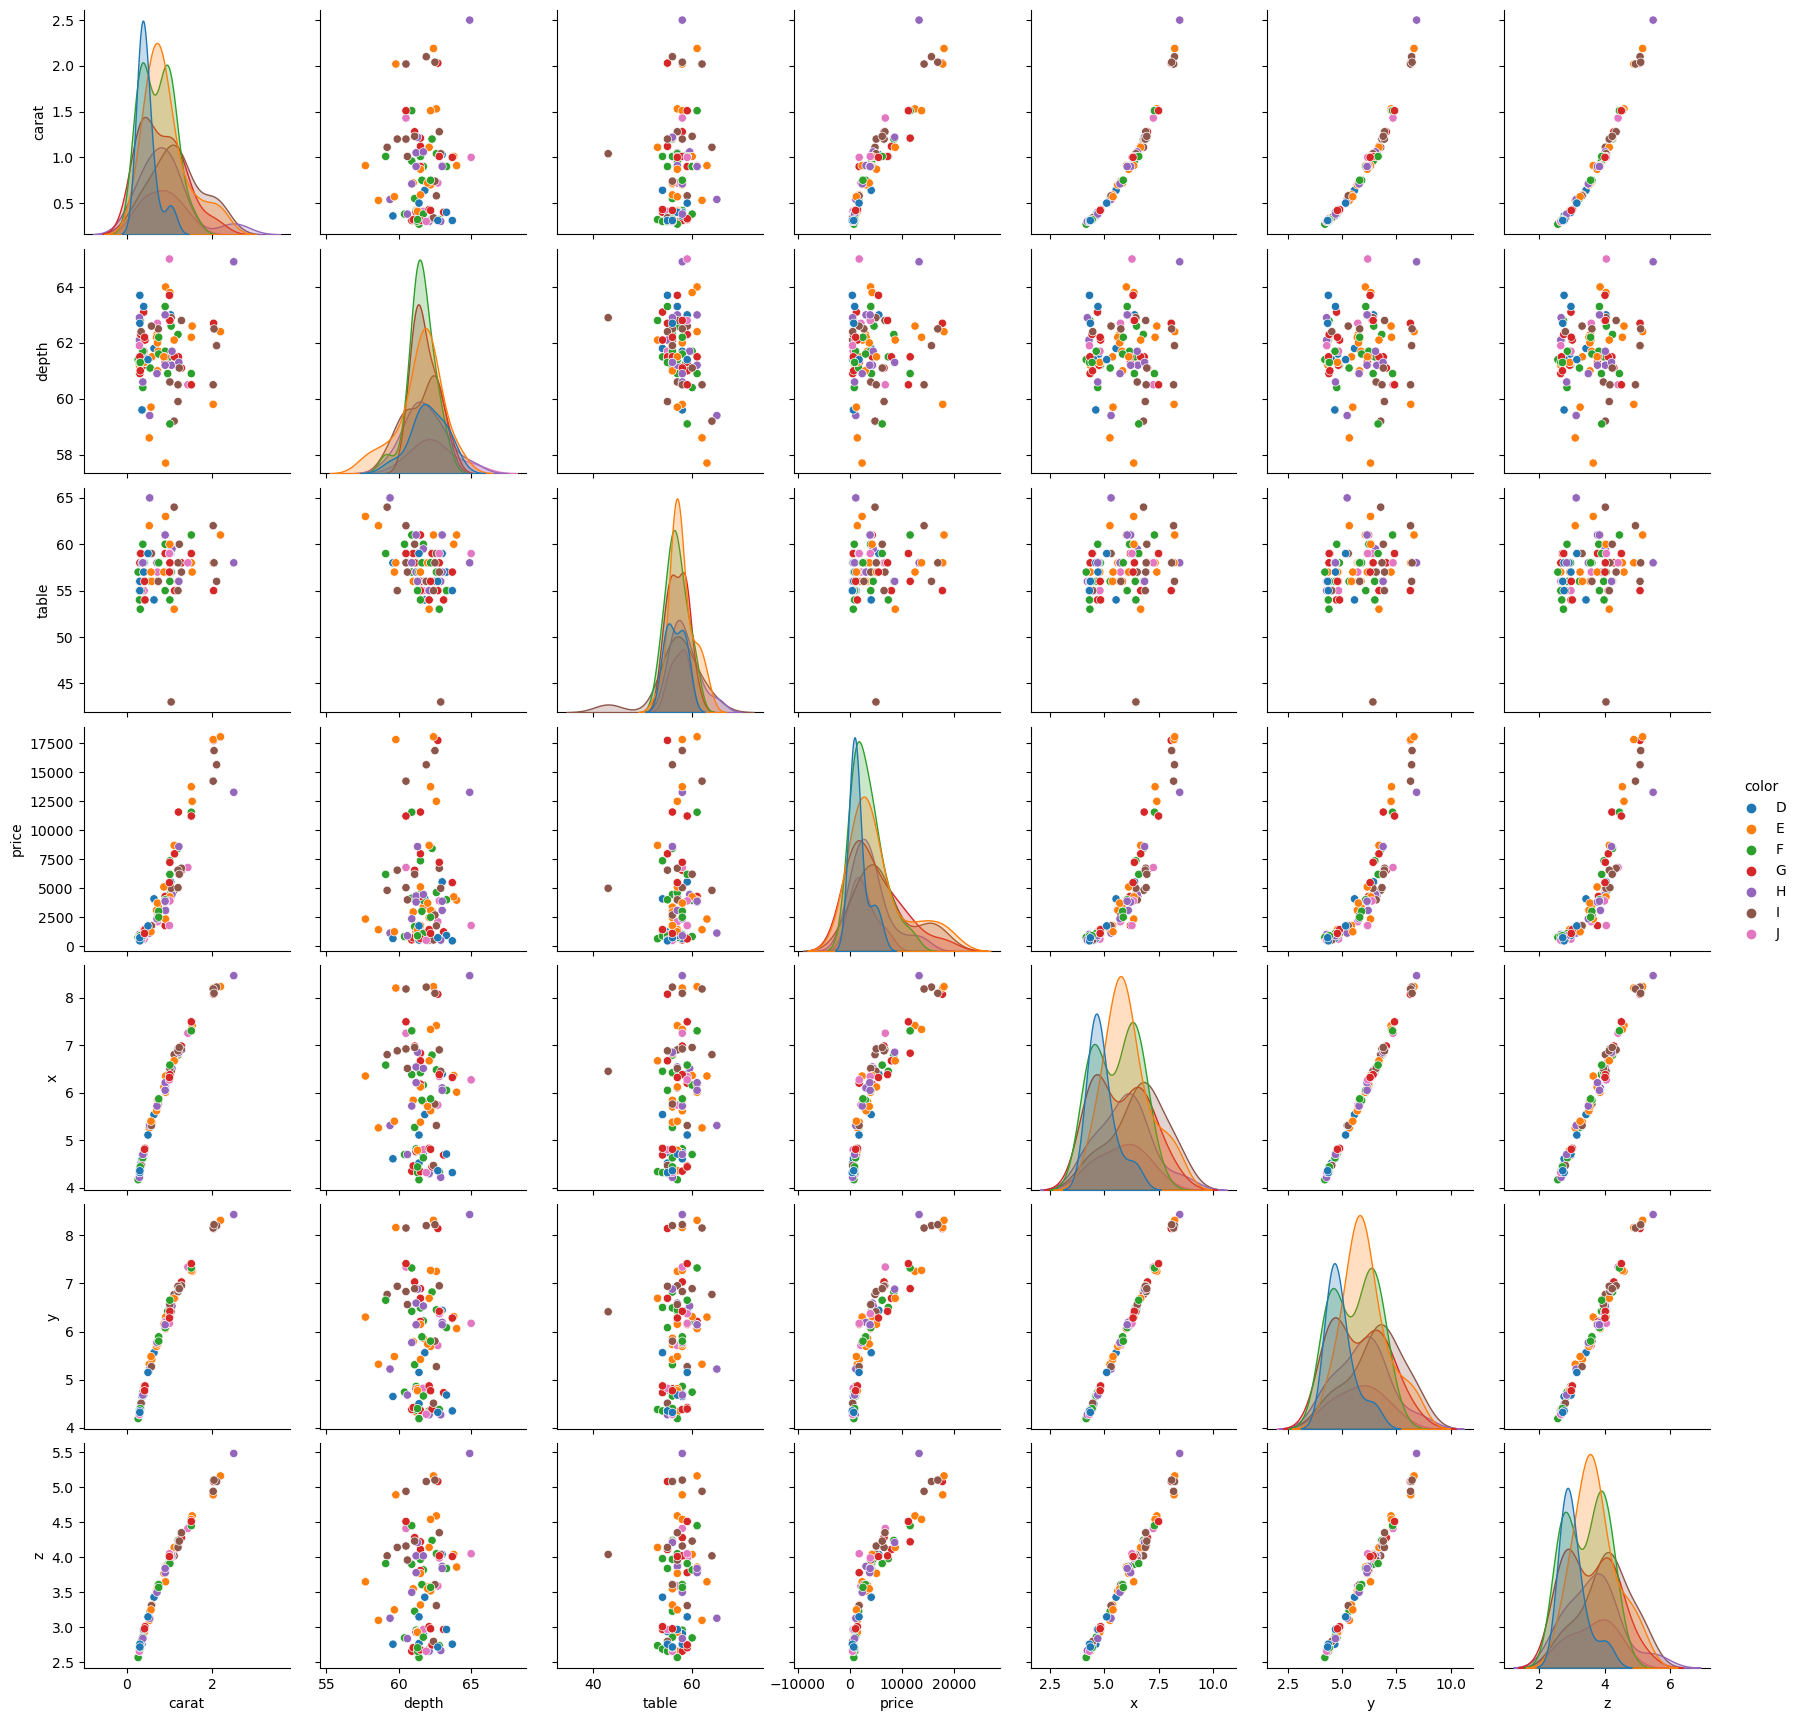

In [12]:
sns.pairplot(diamonds_df.iloc[:,:-2],palette = sns.color_palette(n_colors = len(diamonds_df.color.unique())),hue = 'color')
plt.show()

### Heatmap

In [13]:
corrs = diamonds_df.iloc[:,:-2].select_dtypes(exclude = diamonds_df.cut.dtype).corr()

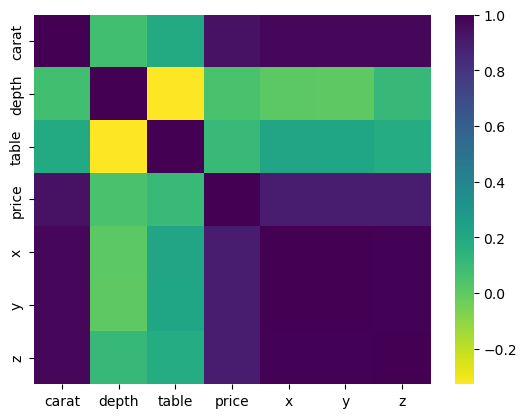

In [14]:
sns.heatmap(corrs,cmap = 'viridis_r')
plt.show()

### Count Plot

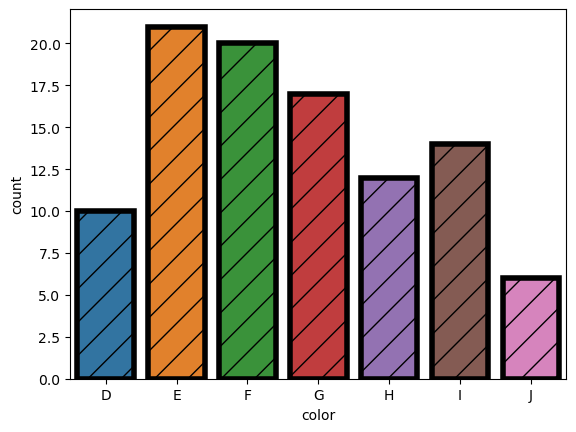

In [15]:
sns.countplot(x='color',data=diamonds_df, lw=4, ec='black',hatch='/')
plt.show()

### Box Plot

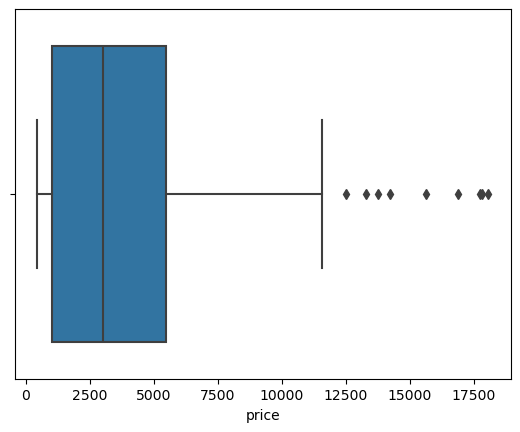

In [17]:
sns.boxplot(data=diamonds_df,x='price')
plt.show()

### Violin Plot

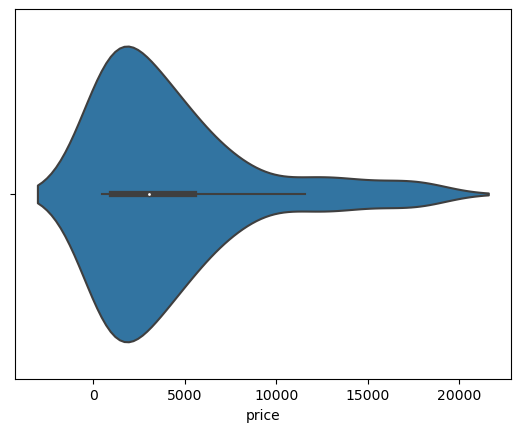

In [19]:
sns.violinplot(data=diamonds_df,x='price')
plt.show()

### KDE Plot

<Axes: xlabel='price', ylabel='Density'>

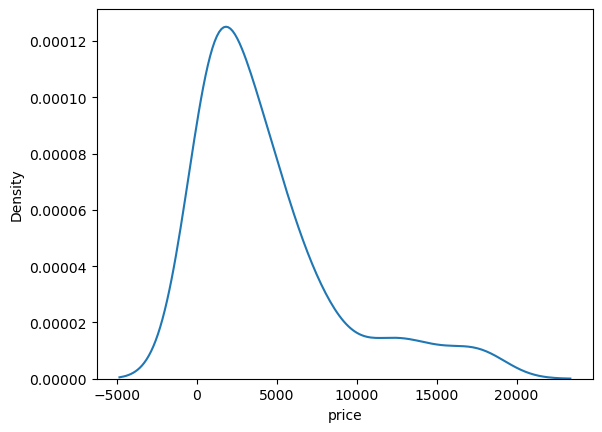

In [22]:
sns.kdeplot(data=diamonds_df,x='price')